# THE SPARKS FOUNDATION
##  Author- Varnika Gupta
### TASK 1- SUPERVISED ML
### TASK STATEMENT
 * Predict the percentage scored of a student based on number of hours studied
 * What will be the predicted score if a student studies for 9.25hrs per day
 
**This is a Simple Regression Problem as it involves only two variables namely Hours and Scores**

### ***Importing necessary libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### ***Reading the Data***

In [2]:
#reading the data as a csv file
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### ***Understanding Data***

In [6]:
#.shape gives us the number of rows and columns as a tuple
df.shape

(25, 2)

In [7]:
#this gives us statistical measures such as mean, standard deviation, quartiles, minimum and maximum about the data given
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#provides us with the information about the table such as null values and dtype
df.info()

df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


* We can see that there are no null values in our dataset 

### ***Visualising Data***

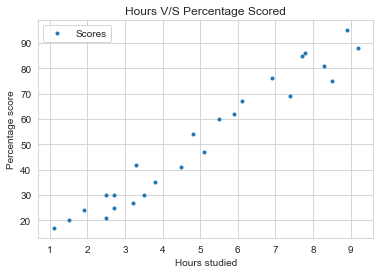

Scatterplot is shown above


In [9]:
sns.set_style("whitegrid")
df.plot(x="Hours",y="Scores",style=".")
plt.title("Hours V/S Percentage Scored")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()
print("Scatterplot is shown above")

* We see a postive correlation between Hours studied and Scores.
* As number of Hours studied increases, Scores increases too.

In [10]:
#using inbuilt function corr in python to prove the above statement
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


* We see a high positive correlation between Hours and Scores. Thus we can conclude that there exists a linear relationship between the two variables

### ***Preparing the data***


* We dibvide the data into attributes(inputs) and labels(output).

In [11]:
#independent and dependent variables

X=df.iloc[:, :-1].values
y=df.iloc[:, 1].values

* We keep Hours as independent variable x and Scores as dependent variable y as we are required to find the Score scored by a student when he studies for 9.25 hrs per day

**Now we need to split our variables into training and testing sets. We use train_test_split from Scikit Learn library to execute this step**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3,random_state=0)

* train_test_split is a function in Sklearn library to split the data into two subsets namely training and testing.
* Here we have allocated 30% of the dataset for testing purpose while the rest 70% is kept for training the model.

In [13]:
#looking at train dataset

X_train

array([[6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [14]:
#looking at test dataset

y_test

array([20, 27, 69, 30, 62, 35, 24, 86], dtype=int64)

### ***Training the Algorithm***


* To train the model in linear regression, we import linear regression model from the Sklearn library
* After splitting our data, wenow finally tarin our algorithm

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
rgr=LinearRegression()
rgr.fit(X_train, y_train)

print("Training complete")

Training complete


 **Plotting the regression line**

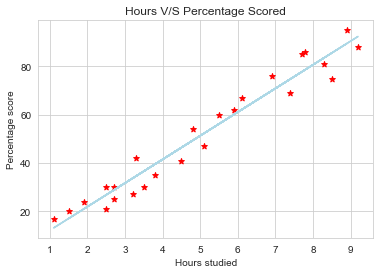

In [17]:
line=rgr.coef_*X+rgr.intercept_

#plotting the test data
plt.scatter(X,y,color="Red",marker="*")
plt.plot(X, line,color="lightblue")
plt.title("Hours V/S Percentage Scored")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()

* The line above best fits the training dataset(70%). 
* The line is of the form of simple linear regression; Y=(Beta 0) + (Beta 1)*X

### ***Making Predictions***
* After training our algorithm, we now make predictions on our test dataset

In [18]:
#testing data - in hours
print(X_test)

#predicting the scores
y_pred=rgr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [19]:
rgr.coef_

array([9.78856669])

In [20]:
rgr.intercept_

2.370815382341881

In [21]:
#comparing actual and predicted values
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


**Now we predict the percentage score by a student who studies for 9.25 hrs per day**

In [22]:
hours= 9.25
new_pred=rgr.predict([[hours]])
print("No. of Hours = {}".format(hours))
print("Predicted Scores = {}".format(new_pred[0]))

No. of Hours = 9.25
Predicted Scores = 92.91505723477056


***Thus we see that a student will score 93 when he studies for 9.25 hrs per day***

### ***Evaluating Model***
* We now evaluate the performance of our algorithm.
* Regression algorithms are mostly evaluated on the following three metrics
***1- Mean Absolute Error(MAE)**
***2- Mean Squared Error(MSE)**
***3- Root Mean Squared Error(RMSE)**

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315


* We see that the value of RMSE is 4.79 which less than 10% of the mean value of the percentages of all the students i.e.;51.48% implying that our algorithm is efficient and works satisfactorily.

In [24]:
print("TASK 1 SUCCESFULLY COMPLETED")

TASK 1 SUCCESFULLY COMPLETED


# Thank you

